In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('/content/consumer_insurance_claims_10000_rows.csv')

In [ ]:
df.head(10)

,Claim_ID,Customer_ID,Customer_Age,Customer_Gender,Customer_Marital_Status,Customer_Income,Customer_Profession,Insurance_Type,Claim_Type,Claim_Amount,...,Policy_Years,Claim_Status,Claim_Settlement_Time,Vehicle_Type,Property_Damage,Location,Policy_Premium,Medical_Expenses,Hospital_Stay_Duration,Incident_Severity
0,1,3564,47,Male,Widowed,32449.82,Lawyer,Home,Health,49271.93,...,14,Approved,6,SUV,1,Urban,4702.95,41768.78,1,High
1,2,1490,67,Male,Divorced,71833.10,Teacher,Life,Accident,19932.57,...,13,Rejected,14,Coupe,1,Urban,984.21,41949.59,3,High
2,3,5698,70,Female,Divorced,95381.03,Farmer,Health,Natural Disaster,37312.27,...,7,Rejected,21,Truck,1,Urban,4019.57,28301.02,14,Low
3,4,4897,60,Female,Divorced,54133.19,Doctor,Life,Accident,34480.44,...,14,Rejected,12,Sedan,0,Urban,511.15,26506.92,7,Medium
4,5,7213,38,Male,Widowed,80778.50,Doctor,Auto,Theft,47811.32,...,12,Pending,26,SUV,0,Urban,1647.21,2531.58,11,Low
5,6,9649,26,Male,Married,39876.00,Teacher,Home,Theft,18913.77,...,3,Pending,25,SUV,1,Rural,4434.67,2992.20,1,Low
6,7,6006,23,Male,Single,101592.24,Farmer,Auto,Health,27467.01,...,9,Rejected,25,Sedan,0,Urban,4236.74,24606.42,6,Low
7,8,4960,65,Male,Widowed,88487.26,Teacher,Life,Natural Disaster,23819.61,...,10,Rejected,20,SUV,0,Rural,2350.12,31067.98,14,Low
8,9,1569,30,Male,Divorced,82000.85,Doctor,Health,Accident,48544.72,...,8,Rejected,26,SUV,1,Urban,3232.25,23004.82,2,High
9,10,4891,29,Female,Married,66781.73,Farmer,Auto,Natural Disaster,49724.75,...,5,Pending,5,Coupe,1,Urban,3180.52,46094.38,11,Medium


In [ ]:
# Show basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Claim_ID                 10000 non-null  int64  
 1   Customer_ID              10000 non-null  int64  
 2   Customer_Age             10000 non-null  int64  
 3   Customer_Gender          10000 non-null  object 
 4   Customer_Marital_Status  10000 non-null  object 
 5   Customer_Income          10000 non-null  float64
 6   Customer_Profession      10000 non-null  object 
 7   Insurance_Type           10000 non-null  object 
 8   Claim_Type               10000 non-null  object 
 9   Claim_Amount             10000 non-null  float64
 10  Claim_Date               10000 non-null  object 
 11  Policy_Years             10000 non-null  int64  
 12  Claim_Status             10000 non-null  object 
 13  Claim_Settlement_Time    10000 non-null  int64  
 14  Vehicle_Type           

In [ ]:
# Show basic information
print(df.describe())

          Claim_ID   Customer_ID  Customer_Age  Customer_Income  Claim_Amount  \
count  10000.00000  10000.000000   10000.00000     10000.000000  10000.000000   
mean    5000.50000   5451.091400      44.06650     74928.653856  25318.178516   
std     2886.89568   2598.868447      15.26963     25903.006694  14329.986304   
min        1.00000   1000.000000      18.00000     30008.270000    505.400000   
25%     2500.75000   3188.750000      31.00000     52715.067500  12942.147500   
50%     5000.50000   5397.500000      44.00000     74796.290000  25435.555000   
75%     7500.25000   7690.000000      57.00000     97418.772500  37649.525000   
max    10000.00000   9998.000000      70.00000    119999.920000  49999.040000   

       Policy_Years  Claim_Settlement_Time  Property_Damage  Policy_Premium  \
count  10000.000000           10000.000000     10000.000000    10000.000000   
mean       8.049300              15.549800         0.498500     2747.745684   
std        4.307984              

In [ ]:
# Check for missing values
print(df.isnull().sum())

Claim_ID                   0
Customer_ID                0
Customer_Age               0
Customer_Gender            0
Customer_Marital_Status    0
Customer_Income            0
Customer_Profession        0
Insurance_Type             0
Claim_Type                 0
Claim_Amount               0
Claim_Date                 0
Policy_Years               0
Claim_Status               0
Claim_Settlement_Time      0
Vehicle_Type               0
Property_Damage            0
Location                   0
Policy_Premium             0
Medical_Expenses           0
Hospital_Stay_Duration     0
Incident_Severity          0
dtype: int64


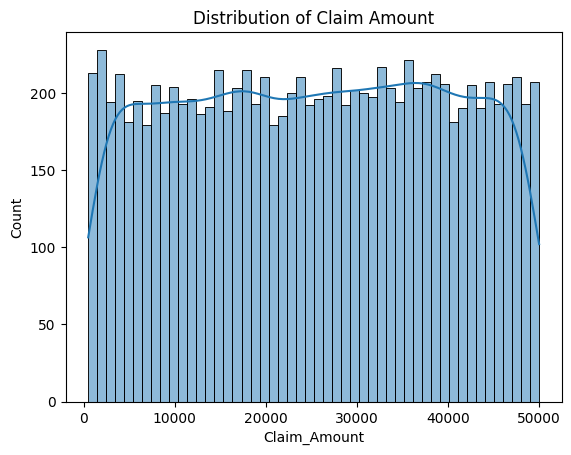

In [ ]:
# Plot distribution of Claim Amount
sns.histplot(df['Claim_Amount'], bins=50, kde=True)
plt.title("Distribution of Claim Amount")
plt.show()


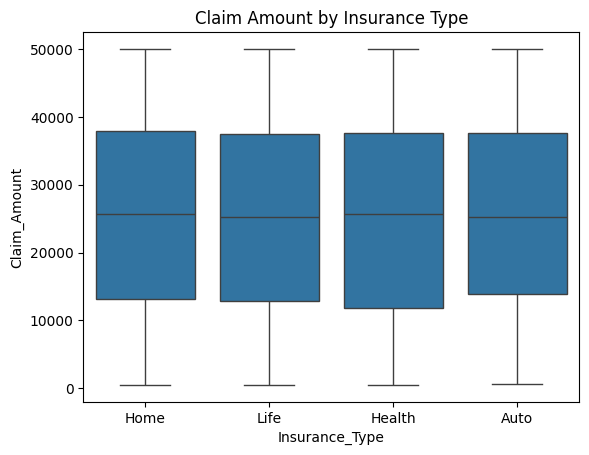

In [ ]:
# Analyze Categorical data
sns.boxplot(x='Insurance_Type', y='Claim_Amount', data=df)
plt.title("Claim Amount by Insurance Type")
plt.show()

#**Data Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Split the data into features and target
X = df.drop(columns=['Claim_Amount'])
y = df['Claim_Amount']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Define the preprocessing pipeline for both numerical and categorical features
numerical_features = ['Customer_Age', 'Customer_Income', 'Policy_Years', 'Claim_Settlement_Time', 'Policy_Premium', 'Medical_Expenses', 'Hospital_Stay_Duration']
categorical_features = ['Customer_Gender', 'Customer_Marital_Status', 'Customer_Profession', 'Insurance_Type', 'Claim_Type', 'Claim_Status', 'Vehicle_Type', 'Location', 'Incident_Severity']


In [ ]:
# Numerical transformations (Imputation + Scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
# Categorical transformations (Imputation + Encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
# Combine both transformations into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# Fit and transform the training data, and transform the test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Check the shape of transformed data
print(X_train_processed.shape)
print(X_test_processed.shape)

(8000, 39)
(2000, 39)


#**Model Building**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Initialize model
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [ ]:
# Train the model
model.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_processed)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 215666242.241883


In [ ]:
print(f'R-squared: {r2}')

R-squared: -0.030248899773087645


#**Model Evaluation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Evaluate using cross-validation
cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-cv_scores.mean()}')


Cross-validated MSE: 209940436.08683875


#**Model Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# Define your parameter grid (you can modify this to suit your needs)
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],   # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider when splitting
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',  # We are minimizing the mean squared error
                           n_jobs=-1,  # Use all available CPU cores for parallel processing
                           verbose=2)  # To display the progress of grid search

In [ ]:
grid_search.fit(X_train_small, y_train_small)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


#**Retrain the Model with Best Parameters**

In [ ]:
# Best estimator with the optimal parameters
best_model = grid_search.best_estimator_


In [ ]:
# Retrain the model on the full training data (if not done already)
best_model.fit(X_train_processed, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      random_state=0)

#**Evaluate the Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_processed)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 212027442.79005852
R-squared: -0.012866164799050894
Mean Absolute Error: 12624.384006374627


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

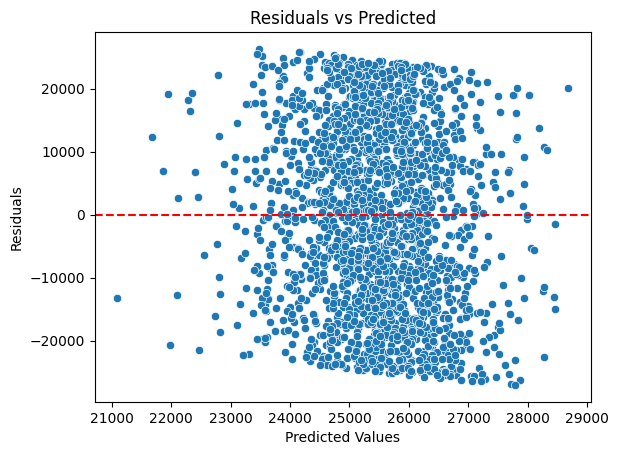

In [ ]:
# Plot residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

#**Model Finalization and Saving**

In [ ]:
import joblib

In [ ]:
# Save the trained model to a file
joblib.dump(best_model, 'insurance_claim_model.pkl')

['insurance_claim_model.pkl']